import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import import_ipynb
from Student_info import country_Student
from Student_info import student_info## Engagement

The data sourced from 365 has a seperate file title 'student_engagement'.
However, exams and quizzes are not labelled with IDs meaning that repetition of exams and quizzes cannot be studied and understood.

This notebook will prepare and combine data regarding student's interaction with exams, quizzes, and student hub questions. And thereby derive a nuanced understanding of student's engagement with the platform.

#### Description

My prospective oversight for this notebook involves:

 - Importing notebooks (exams, quizzes, student hub questions)
 - Data cleaning & prepping
 - Creating either a KPI or list of sorts to represent student IDs based on engagement?
 
#### Update

I have divided the student engagement sample into two categories (above & below avg engagement).

From here much of the provided data can be divided based on engagement levels such as:
 - exams frequency and completion time.
 - quizzes freequency and completion time.
 - student hub questions.
 - student membership type? which type of membership is popular among the most and least engaged students.
 - Nationalities represented by engagement level.

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import import_ipynb
import collections

In [7]:
# Dependencies 
from Student_info import country_Student
from Student_info import student_info
from student_hub_questions import student_hub_country
from student_exams import student_exam_by_country
from student_quizzes import student_quiz_by_country
from student_purchases import student_purchases_by_country

# Dependencies from student_engagement
from student_engagement import above_avg_countries, below_avg_countries, above_avg_ID, below_avg_ID, student_engagement_by_country
# They are all dicts, Keys are labels and values are the frequency of representation



In [8]:
engagement_dates = student_engagement_by_country['date_engaged'].value_counts().to_dict()

engagement_dates_ordered = collections.OrderedDict(sorted(engagement_dates.items()))

# engagement_dates_ordered

purchase_dates = student_purchases_by_country['date_purchased'].value_counts().to_dict()

purchase_dates_ordered = collections.OrderedDict(sorted(purchase_dates.items()))

# purchase_dates_ordered

The above cell contains two dictionaries for information on purchases and engagement.

Keys are the dates and the values are the frequency of engagement or purchases respectively.

From these two dictionaries we can track the level of engagement and purchases across time.

##### Update

Ordered the dictionaries containing both engagement and purchase dates using the collection module.



<function matplotlib.pyplot.show(close=None, block=None)>

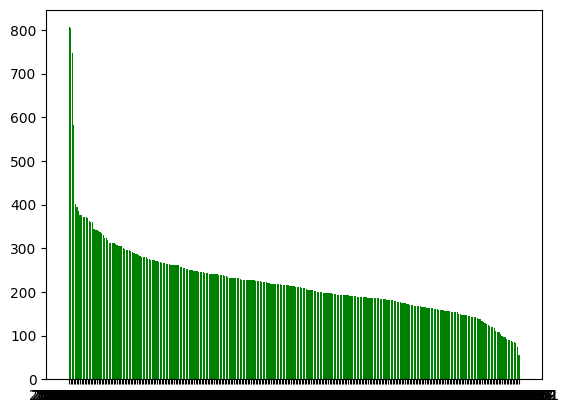

In [9]:
plt.bar(list(engagement_dates.keys()),engagement_dates.values(),color='g')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

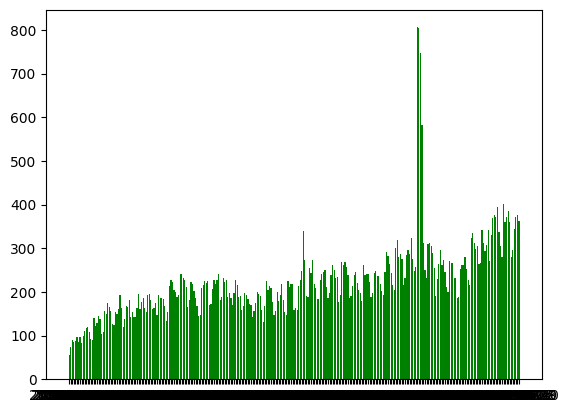

In [10]:
plt.bar(list(engagement_dates_ordered.keys()),engagement_dates_ordered.values(),color='g')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

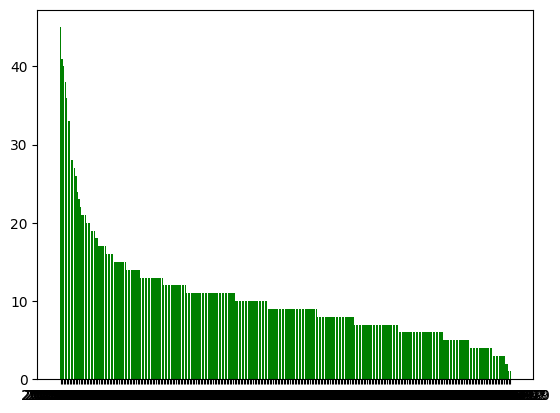

In [13]:
plt.bar(list(purchase_dates.keys()),purchase_dates.values(),color='g')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

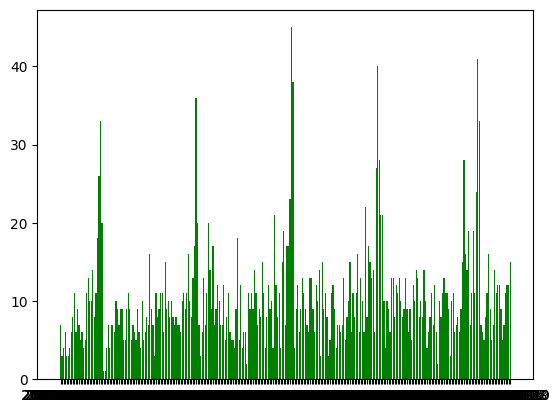

In [12]:
plt.bar(list(purchase_dates_ordered.keys()),purchase_dates_ordered.values(),color='g')
plt.show